In [6]:
# -*- coding: utf-8 -*-
#
# Based on Keras MNIST CNN example (François Chollet)
# https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
# LICENSE : The MIT License (MIT)
#
from __future__ import print_function
import numpy as np
np.set_printoptions(threshold=np.nan) 
np.random.seed(20170712)              
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128 
num_classes = 10 
epochs = 1       

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))          
model.add(MaxPooling2D(pool_size=(2, 2)))           
model.add(Conv2D(32, (5, 5), activation='relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))           
model.add(Dropout(0.25))                            
model.add(Flatten())                                
model.add(Dense(128, activation='relu'))            
model.add(Dropout(0.5))                             
model.add(Dense(num_classes, activation='softmax')) 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              #optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,                 
          batch_size=batch_size,            
          epochs=epochs,                    
          verbose=1,                        
          validation_data=(x_test, y_test)) 

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 59s - loss: 0.3985 - acc: 0.8730 - val_loss: 0.0700 - val_acc: 0.9765
Test loss: 0.0700407062078
Test accuracy: 0.9765


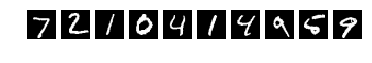

In [7]:
import matplotlib.pyplot as plt

images = x_test.reshape(10000, 28, 28)

plotpos = 1
for idx in range(10):
    plt.subplot(5, 10, plotpos)
    plt.imshow(images[idx])
    plt.gray()
    plt.axis('off')
    plotpos += 1
plt.show()

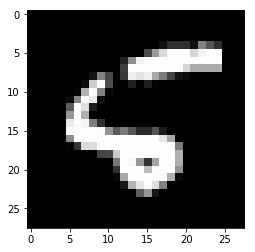

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [8]:
idx = 8

plt.imshow(images[idx])
plt.gray()
plt.show()

print(y_test[idx])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
__________

In [12]:
print("save model as HDF5")
model.save('./mnist_cnn_train1.h5')

save model as HDF5


In [13]:
from keras.models import load_model

model2 = load_model('./mnist_cnn_train1.h5')

history2 = model2.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=20,             
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 71s - loss: 0.1218 - acc: 0.9632 - val_loss: 0.0493 - val_acc: 0.9830
Epoch 2/20
60000/60000 [==============================] - 67s - loss: 0.0877 - acc: 0.9734 - val_loss: 0.0344 - val_acc: 0.9874
Epoch 3/20
60000/60000 [==============================] - 72s - loss: 0.0726 - acc: 0.9782 - val_loss: 0.0289 - val_acc: 0.9907
Epoch 4/20
60000/60000 [==============================] - 65s - loss: 0.0626 - acc: 0.9813 - val_loss: 0.0272 - val_acc: 0.9899
Epoch 5/20
60000/60000 [==============================] - 68s - loss: 0.0564 - acc: 0.9826 - val_loss: 0.0248 - val_acc: 0.9925
Epoch 6/20
60000/60000 [==============================] - 68s - loss: 0.0509 - acc: 0.9850 - val_loss: 0.0253 - val_acc: 0.9915
Epoch 7/20
60000/60000 [==============================] - 64s - loss: 0.0449 - acc: 0.9866 - val_loss: 0.0255 - val_acc: 0.9917
Epoch 8/20
60000/60000 [==============================

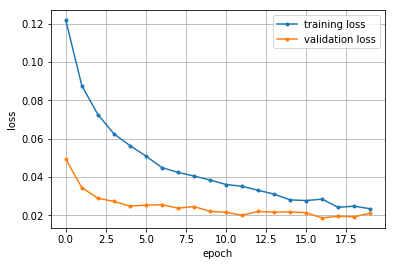

In [14]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epoch = len(loss)
plt.plot(range(epoch), loss, marker='.', label='training loss')
plt.plot(range(epoch), val_loss, marker='.', label='validation loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
print("save model as HDF5")
model2.save('mnist_cnn_train1_fine20.h5')

print("done")

save model as HDF5
done


In [16]:
for layer in model2.layers:
    lay_config = layer.get_config()
    lay_weights = layer.get_weights()
    print('*** layer config ***')
    print(lay_config)
    print('*** layer weights ***')
    print(lay_weights)

*** layer config ***
{'name': 'conv2d_3', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 16, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
*** layer weights ***
[array([[[[ 0.08716947, -0.00585935, -0.22555068,  0.03326912, -0.03277551,
          -0.03365153,  0.06724275,  0.00729703,  0.09733178,  0.09137829,
           0.01532396,  0.18641534,  0.17350267,  0.30473378,  0.0459873 ,
           0.12218003]],

        [[ 0.07494453,  0.0240033 , -0.07868456,  0.06880289, -0.07708639,
          -0.06184

[array([[ -5.74494191e-02,  -3.94419953e-02,  -3.05589080e-01,
          1.42758325e-01,  -1.01773687e-01,  -8.72658640e-02,
         -1.31772747e-02,   1.45919591e-01,   9.46001336e-02,
         -6.33025467e-02,  -1.53057054e-01,   2.69040857e-02,
         -8.36561546e-02,  -9.24379751e-02,  -9.95163545e-02,
         -2.06560671e-01,   7.79220760e-02,   8.56034309e-02,
          4.01030816e-02,  -5.37213199e-02,  -2.54893880e-02,
          3.54476050e-02,  -1.92518860e-01,   1.35393485e-01,
         -2.60634869e-01,   1.21257417e-02,  -1.23993903e-01,
         -3.31572667e-02,  -2.72068322e-01,  -5.82412891e-02,
          1.23040751e-01,  -1.61367446e-01,  -1.38741154e-02,
          2.28857584e-02,  -2.25921005e-01,  -2.25694135e-01,
          1.54320538e-01,  -2.24718854e-01,  -8.60737190e-02,
          7.43062645e-02,  -1.20425150e-02,  -5.18020941e-03,
          1.05674021e-01,  -1.48858130e-02,   9.18968320e-02,
         -8.93956497e-02,  -8.30221400e-02,   1.67219698e-01,
       

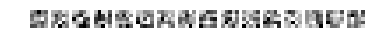

In [17]:
layidx = 0
params_list = model2.layers[0].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

images = weights_array.reshape(1, 16, 5, 5)

plotpos = 1
for idx in range(16):
    plt.subplot(1, 16, plotpos)
    plt.imshow(images[0][idx])
    plt.gray()
    plt.axis('off')
    plotpos += 1
plt.show()

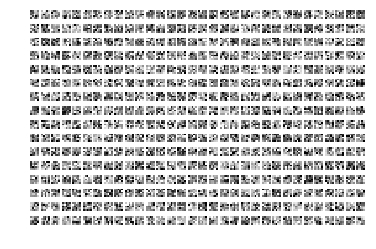

In [18]:
layidx = 2
params_list = model2.layers[layidx].get_weights()
weights_array = params_list[0]

images = weights_array.reshape(16, 32, 5, 5)

plotpos = 1
for idx1 in range(16):
    for idx2 in range(32):
        plt.subplot(16, 32, plotpos)
        plt.imshow(images[idx1][idx2])
        plt.gray()
        plt.axis('off')
        plotpos += 1
plt.show()

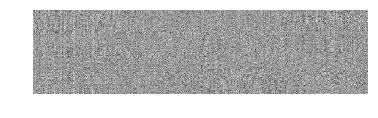

In [19]:
layidx = 6
params_list = model2.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

image = weights_array.reshape(128, 512)

plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

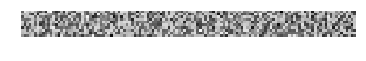

In [20]:
layidx = 8
params_list = model2.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]

image = weights_array.reshape(10, 128)

plt.imshow(image)
plt.gray()
plt.axis('off')
plt.show()

In [21]:
model3 = load_model('./mnist_cnn_train1_fine20.h5')

history3 = model3.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=100,              
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 44s - loss: 0.0229 - acc: 0.9927 - val_loss: 0.0229 - val_acc: 0.9934
Epoch 2/100
60000/60000 [==============================] - 44s - loss: 0.0244 - acc: 0.9918 - val_loss: 0.0202 - val_acc: 0.9945
Epoch 3/100
60000/60000 [==============================] - 47s - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0215 - val_acc: 0.9937
Epoch 4/100
60000/60000 [==============================] - 42s - loss: 0.0213 - acc: 0.9929 - val_loss: 0.0210 - val_acc: 0.9936
Epoch 5/100
60000/60000 [==============================] - 41s - loss: 0.0207 - acc: 0.9936 - val_loss: 0.0193 - val_acc: 0.9942
Epoch 6/100
60000/60000 [==============================] - 44s - loss: 0.0192 - acc: 0.9936 - val_loss: 0.0252 - val_acc: 0.9930
Epoch 7/100
60000/60000 [==============================] - 42s - loss: 0.0191 - acc: 0.9940 - val_loss: 0.0203 - val_acc: 0.9946
Epoch 8/100
60000/60000 [======================

60000/60000 [==============================] - 43s - loss: 0.0096 - acc: 0.9968 - val_loss: 0.0264 - val_acc: 0.9950
Epoch 64/100
60000/60000 [==============================] - 43s - loss: 0.0112 - acc: 0.9966 - val_loss: 0.0277 - val_acc: 0.9937
Epoch 65/100
60000/60000 [==============================] - 44s - loss: 0.0105 - acc: 0.9962 - val_loss: 0.0310 - val_acc: 0.9934
Epoch 66/100
60000/60000 [==============================] - 44s - loss: 0.0095 - acc: 0.9970 - val_loss: 0.0297 - val_acc: 0.9939.
Epoch 67/100
60000/60000 [==============================] - 43s - loss: 0.0093 - acc: 0.9972 - val_loss: 0.0318 - val_acc: 0.9931
Epoch 68/100
60000/60000 [==============================] - 44s - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0282 - val_acc: 0.9943
Epoch 69/100
60000/60000 [==============================] - 45s - loss: 0.0085 - acc: 0.9971 - val_loss: 0.0319 - val_acc: 0.9935
Epoch 70/100
60000/60000 [==============================] - 43s - loss: 0.0089 - acc: 0.9971 - val_los

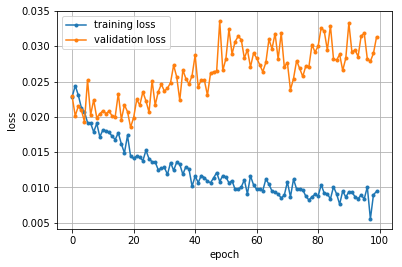

In [22]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epoch = len(loss)
plt.plot(range(epoch), loss, marker='.', label='training loss')
plt.plot(range(epoch), val_loss, marker='.', label='validation loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [23]:
print("save model as HDF5")
model3.save('./mnist_cnn_train1_fine20_fine100.h5')

print("done")

save model as HDF5
done


In [24]:
for layer in model3.layers:
    lay_config = layer.get_config()
    lay_weights = layer.get_weights()
    print('*** layer config ***')
    print(lay_config)
    print('*** layer params ***')
    print(lay_weights)

*** layer config ***
{'name': 'conv2d_3', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 16, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
*** layer params ***
[array([[[[  1.63746983e-01,   2.85001937e-02,  -1.52845278e-01,
           -3.39624695e-02,  -4.86173965e-02,  -1.04482934e-01,
            9.54045653e-02,   4.30212021e-02,   6.63402677e-02,
           -1.34333083e-02,  -1.20178983e-02,   1.05963305e-01,
            1.03352226e-01,   4.05571282e-01,   2.71053184e-02,
            2.32539743e-0

[]
*** layer config ***
{'name': 'conv2d_4', 'trainable': True, 'filters': 32, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
*** layer params ***
[array([[[[  1.23357782e-02,  -1.15780070e-01,  -2.61374474e-01,
            1.84247315e-01,  -1.12678379e-01,   3.73404115e-01,
           -2.41741076e-01,  -4.40511107e-02,   1.71371400e-01,
           -6.97074682e-02,  -2.17397069e-03,  -1.87405482e-01,
            3.59696090e-01,   5.08485995e-02,   5.51402308e-02,
            3.12319070e-01,  -2.47498363e-01,  -1.50579676e-01,
           -5.4303

[array([[  7.41067752e-02,   9.29269288e-03,  -5.45586109e-01,
         -1.15373190e-02,  -1.89640924e-01,  -3.05642635e-01,
          3.16047549e-01,  -3.93841006e-02,  -1.36227412e-02,
         -2.00557113e-01,  -5.03914475e-01,  -2.08066031e-02,
         -3.93831998e-01,  -1.62785217e-01,  -1.67909995e-01,
          2.70652212e-03,   1.80132255e-01,   1.14559494e-01,
          4.20906842e-02,   4.41753082e-02,   9.43461582e-02,
         -1.73495740e-01,  -3.01898122e-01,   2.64463276e-01,
         -4.95431066e-01,  -5.42507432e-02,  -3.50022465e-01,
         -7.96083137e-02,  -4.90345471e-02,  -1.43271565e-01,
          2.34936386e-01,   1.38202440e-02,  -5.07361069e-02,
          1.15815543e-01,  -5.42393982e-01,  -5.36941707e-01,
          1.94110483e-01,  -3.60991508e-01,  -1.22473985e-01,
         -3.12658474e-02,  -2.53894061e-01,   2.34300680e-02,
         -1.82212889e-01,   6.04124591e-02,   1.19098626e-01,
          6.70403102e-03,  -1.25707850e-01,   4.00882885e-02,
       

In [25]:
import codecs, json

print("output weights as JSON")

filename = "mnist_cnn_train121_params_layer%d.json"

layidx = 0
params_list = model3.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

layidx = 1

layidx = 2
params_list = model3.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

layidx = 3

layidx = 4

layidx = 5

layidx = 6
params_list = model3.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

layidx = 7

layidx = 8
params_list = model3.layers[layidx].get_weights()
weights_array = params_list[0]
biases_array = params_list[1]
dict = {}
dict['weights'] = weights_array.tolist()
dict['biases'] = biases_array.tolist()
file_path = filename % layidx
json.dump(dict,
          codecs.open(file_path, 'w', encoding='utf-8'),
          separators=(',', ':'),
          sort_keys=False,
          indent=4)

print("done")

output weights as JSON
done


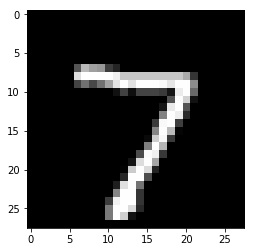

const float test_data[784] = {
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
1.000000,
0.000000,
0.000000,
};

const float test_data[784] = {
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.000000,
0.00

In [26]:
images = x_test.reshape(10000, 28, 28)

idx = 0

plt.imshow(images[idx])
plt.gray()
plt.show()

print('const float test_data[784] = {')
for n in range(10):
    print('%f,' % y_test[idx][n])
print('};\n')

print('const float test_data[784] = {')
for row in range(28):
    for col in range(28):
        print('%f,' % images[idx][row][col])
print('};')
